## Analisis de Sentimientos en comentarios de la Revista New York Time

In [3]:
# librerias
import pandas as pd
import seaborn as sns
from textblob import TextBlob 

In [8]:
# cargar datos
df = pd.read_csv('./data/nyt.csv')
df.head(5)

,content
0,If the choice is between mining for bitcoin - ...
1,"<br/>To me, Bitcoin (et al) appears to be an e..."
2,Bitcoin is a pyramid scheme backed by nothing ...
3,What does it cost in energy to dig up and refi...
4,You forgot to mention stock buybacks.


### Crear una nueva columna con los comentarios traducidos

In [10]:
df['content_esp'] = df['content'].apply(lambda x: TextBlob(x).translate(to='es'))

AttributeError: 'list' object has no attribute 'strip'

### Crear columna de Polaridad de cada comentario

In [11]:
df['polarity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,content,polarity
0,If the choice is between mining for bitcoin - ...,-0.150000
1,"<br/>To me, Bitcoin (et al) appears to be an e...",-0.107143
2,Bitcoin is a pyramid scheme backed by nothing ...,0.008566
3,What does it cost in energy to dig up and refi...,0.146892
4,You forgot to mention stock buybacks.,0.000000


### Crear columna de Subjetividad de cada comentario

In [12]:
df['subjectivity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head()

,content,polarity,subjectivity
0,If the choice is between mining for bitcoin - ...,-0.150000,0.250000
1,"<br/>To me, Bitcoin (et al) appears to be an e...",-0.107143,0.471429
2,Bitcoin is a pyramid scheme backed by nothing ...,0.008566,0.415734
3,What does it cost in energy to dig up and refi...,0.146892,0.598589
4,You forgot to mention stock buybacks.,0.000000,0.000000


### Valor maximo de Polaridad

In [13]:
df['polarity'].max()

1.0

### Valor minimo de Polaridad

In [14]:
df['polarity'].min()

-1.0

### Promedio de Polaridad

In [15]:
df['polarity'].mean()

0.0596143580842847

### Grafica de la Polaridad y subjetividad

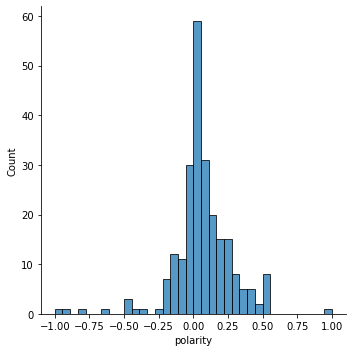

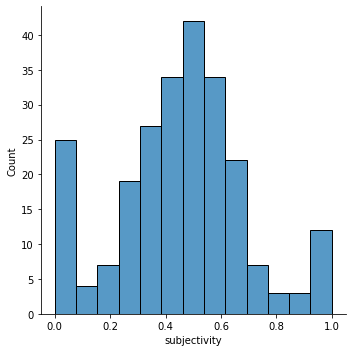

In [16]:
sns.displot(df['polarity'])
sns.displot(df['subjectivity'])

### Agregar columnas al dataframe con un ciclo while y variar el nombre de cada columna

In [18]:
n = 1
while n < 5:
    df['P'+ str(n)] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
    df['S'+ str(n)] = df['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    n += 1

df.head()

,content,polarity,subjectivity,P1,S1,P2,S2,P3,S3,P4,S4
0,If the choice is between mining for bitcoin - ...,-0.150000,0.250000,-0.150000,0.250000,-0.150000,0.250000,-0.150000,0.250000,-0.150000,0.250000
1,"<br/>To me, Bitcoin (et al) appears to be an e...",-0.107143,0.471429,-0.107143,0.471429,-0.107143,0.471429,-0.107143,0.471429,-0.107143,0.471429
2,Bitcoin is a pyramid scheme backed by nothing ...,0.008566,0.415734,0.008566,0.415734,0.008566,0.415734,0.008566,0.415734,0.008566,0.415734
3,What does it cost in energy to dig up and refi...,0.146892,0.598589,0.146892,0.598589,0.146892,0.598589,0.146892,0.598589,0.146892,0.598589
4,You forgot to mention stock buybacks.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
